# <font color='#FFE15D'>**Week 11: Logistic Regression 🔴🔵**</font>

## **🔸 Multiclass Classification (One vs. All) (from Scratch)**

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize

import numpy as np
import matplotlib.pyplot as plt

### Data

In [2]:
X, y = load_iris(return_X_y=True)
X.shape, y.shape

((150, 4), (150,))

In [3]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [4]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=25)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120,), (30,))

In [5]:
np.unique(y_train)

array([0, 1, 2])

In [6]:
# sample or test code
label_binarize(y_train,classes=[0,1,2])

array([[0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [1,

In [7]:
x_train_aug = np.hstack((np.ones((len(x_train), 1)), x_train))  # Augment
y_train_oh = label_binarize(y_train, classes=np.unique(y_train))  # one hot
x_train_aug.shape, y_train_oh.shape

((120, 5), (120, 3))

### Logistic Regression Model

In [8]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [9]:
def multi_logistic_regression(x, w):
    # x: nx(m+1)
    # w: (m+1)xc
    # y_hat: nxc

    y_hat = sigmoid(x @ w)
    return y_hat

In [10]:
# sample or test code
tmp = np.random.randn(5, 3)
tmp.shape

(5, 3)

In [11]:
y_hat = multi_logistic_regression(x_train_aug, np.random.randn(5, 3))
y_hat.shape

(120, 3)

### Binary Cross Entropy (BCE)

In [12]:
def bce(y, y_hat):
    loss = -np.mean(np.sum(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat), 1))
    return loss

In [13]:
bce(y_train_oh, y_hat)

4.073240704754933

### Gradient

$\nabla L_w(w)=\frac{1}{n}X^T(\hat{y}-y)$

In [14]:
def gradient(x, y, y_hat):
    # x: nx(m+1)
    # y: nxc
    # y_hat: nxc
    # grads: (m+1)xc

    grads = (x.T @ (y_hat - y)) / len(y)
    return grads

In [15]:
grad = gradient(x_train_aug, y_train_oh, y_hat)

grad.shape, grad

((5, 3),
 array([[-0.33264153,  0.22894279,  0.53682581],
        [-1.6681436 ,  1.2880062 ,  2.9842382 ],
        [-1.15499961,  0.77820658,  1.64088606],
        [-0.47924641,  0.69245413,  1.65606536],
        [-0.0757309 ,  0.21252919,  0.46115937]]))

### Gradient Descent

In [16]:
def gradient_descent(w, eta, grads):
    w -= eta * grads
    return w

### Accuracy

In [17]:
def accuracy(y, y_hat):
    acc = np.sum(y == np.argmax(y_hat, 1)) / len(y)
    return acc

In [18]:
np.argmax(y_hat, 1)

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [19]:
accuracy(y_train, y_hat)

0.35

### Train

In [20]:
n, mp = x_train_aug.shape
c = len(np.unique(y))

w = np.random.randn(mp, c)
w.shape

(5, 3)

In [21]:
w

array([[ 1.48594441, -0.43899101, -0.53952864],
       [ 2.06541703,  1.60566462,  0.56568708],
       [ 0.85301641, -0.58696232, -1.03486302],
       [ 0.57895176, -0.81287333,  1.11122569],
       [-0.3575684 , -0.24906872, -1.49748643]])

In [22]:
eta = 0.01
n_epochs = 1000

In [23]:
error_hist = []

for epoch in range(n_epochs):
    # predictions
    y_hat = multi_logistic_regression(x_train_aug, w)

    # loss
    e = bce(y_train_oh, y_hat)
    error_hist.append(e)
    
    # gradients
    grads = gradient(x_train_aug, y_train_oh, y_hat)
    
    # gradient descent
    w = gradient_descent(w, eta, grads)
    
    if (epoch+1) % 100 == 0:
        print(f'Epoch={epoch}, \t E={e:.4}')

Epoch=99, 	 E=1.289
Epoch=199, 	 E=1.15
Epoch=299, 	 E=1.075
Epoch=399, 	 E=1.029
Epoch=499, 	 E=0.995
Epoch=599, 	 E=0.9687
Epoch=699, 	 E=0.9469
Epoch=799, 	 E=0.9282
Epoch=899, 	 E=0.9117
Epoch=999, 	 E=0.897


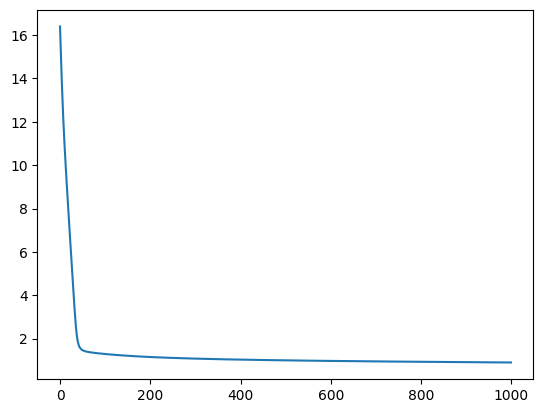

In [24]:
plt.plot(error_hist, label='Train');

In [25]:
w

array([[ 1.28175724, -0.56720157, -0.8052957 ],
       [ 0.40829394,  0.94031053, -0.32387949],
       [ 0.53219837, -1.62392638, -1.46830085],
       [-1.54776699, -0.1853453 ,  1.72176419],
       [-1.15960264, -0.16556262, -0.70204056]])

### Test

In [26]:
x_test_aug = np.hstack((np.ones((len(x_test), 1)), x_test))
x_test_aug.shape, y_test.shape

((30, 5), (30,))

In [27]:
y_hat_test = multi_logistic_regression(x_test_aug, w)
y_hat_test

array([[0.9435112 , 0.18369182, 0.00542321],
       [0.01568938, 0.53504318, 0.7041409 ],
       [0.01594024, 0.19724483, 0.39796482],
       [0.03628748, 0.17571657, 0.24673141],
       [0.0032766 , 0.38182169, 0.76462896],
       [0.05916282, 0.41372201, 0.28209057],
       [0.01335529, 0.28714491, 0.49677715],
       [0.92671348, 0.1300563 , 0.00791505],
       [0.11088919, 0.46399811, 0.39124833],
       [0.15187754, 0.4066379 , 0.30533847],
       [0.92741876, 0.10674889, 0.00372868],
       [0.92487655, 0.205035  , 0.00524805],
       [0.89956795, 0.14807543, 0.00708328],
       [0.01353497, 0.40520009, 0.68372803],
       [0.92089932, 0.11182089, 0.00613552],
       [0.04280554, 0.46546548, 0.45177285],
       [0.00428057, 0.40044418, 0.77401479],
       [0.00640464, 0.3865644 , 0.55760426],
       [0.12261828, 0.29042443, 0.16918773],
       [0.04729206, 0.33631811, 0.43421454],
       [0.17022427, 0.43932269, 0.24142975],
       [0.05985327, 0.32528853, 0.35067564],
       [0.

In [28]:
accuracy(y_test, y_hat_test)

0.8

In [29]:
y_test, np.argmax(y_hat_test, 1)

(array([0, 1, 1, 1, 2, 1, 2, 0, 1, 1, 0, 0, 0, 2, 0, 1, 2, 2, 1, 1, 1, 1,
        1, 0, 0, 2, 1, 2, 2, 0]),
 array([0, 2, 2, 2, 2, 1, 2, 0, 1, 1, 0, 0, 0, 2, 0, 1, 2, 2, 1, 2, 1, 2,
        2, 0, 0, 2, 1, 2, 2, 0], dtype=int64))

### My test: Using polynomial on iris

In [30]:
X, y = load_iris(return_X_y=True)
X.shape, y.shape

use_poly=True
degree = 2
interaction_only=True

In [31]:
# using polynomial
if use_poly:
    from sklearn.preprocessing import PolynomialFeatures

    poly = PolynomialFeatures(degree=degree, interaction_only=interaction_only)
    poly.fit_transform (X)

In [32]:
x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=25
)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120,), (30,))

In [33]:
x_train_aug = np.hstack((np.ones((len(x_train), 1)), x_train))  # Augment
y_train_oh = label_binarize(y_train, classes=np.unique(y_train))  # one hot
x_train_aug.shape, y_train_oh.shape

((120, 5), (120, 3))

In [34]:
n, mp = x_train_aug.shape
c = len(np.unique(y))

# np.random.seed(25)
np.random.seed(24)
w = np.random.randn(mp, c)

In [35]:
eta = 0.01
n_epochs = 1000
error_hist = []

for epoch in range(n_epochs):
    # predictions
    y_hat = multi_logistic_regression(x_train_aug, w)

    # loss
    e = bce(y_train_oh, y_hat)
    error_hist.append(e)
    
    # gradients
    grads = gradient(x_train_aug, y_train_oh, y_hat)
    
    # gradient descent
    w = gradient_descent(w, eta, grads)
    
    if (epoch+1) % 100 == 0:
        print(f'Epoch={epoch}, \t E={e:.4}')
# plt.plot(error_hist, label='Train');

Epoch=99, 	 E=1.294
Epoch=199, 	 E=1.123
Epoch=299, 	 E=1.04
Epoch=399, 	 E=0.9901
Epoch=499, 	 E=0.9563
Epoch=599, 	 E=0.931
Epoch=699, 	 E=0.9108
Epoch=799, 	 E=0.8941
Epoch=899, 	 E=0.8796
Epoch=999, 	 E=0.8669


In [36]:
if use_poly:
    poly.transform(x_test)

x_test_aug = np.hstack((np.ones((len(x_test), 1)), x_test))


y_hat_test = multi_logistic_regression(x_test_aug, w)
x_test_aug.shape, y_test.shape, y_hat_test.shape

((30, 5), (30,), (30, 3))

In [37]:
accuracy(y_test, y_hat_test)

0.8666666666666667